In [1]:
#pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [7]:
data = pd.read_csv('./Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [11]:
data.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Simple Linear Regression

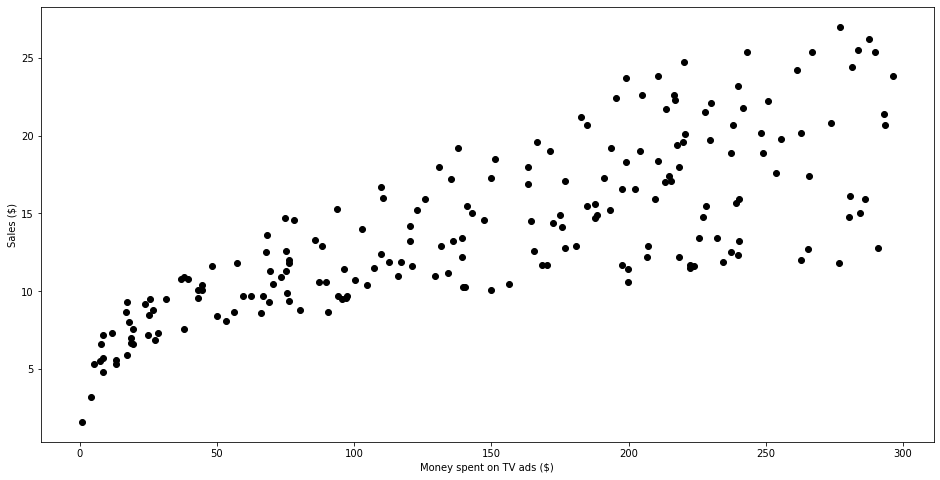

In [12]:
plt.figure(figsize = (16,8))
plt.scatter(
    data['TV'],
    data['sales'],
    c = 'black')

plt.xlabel("Money spent on TV ads ($)")
plt.ylabel('Sales ($)')
plt.show();

In [13]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1, 1)

reg = LR()
reg.fit(X,y)

print('The linear regression model is: Y = {:.5} + {:.5}X'.format(reg.intercept_[0], reg.coef_[0][0]))

The linear regression model is: Y = 7.0326 + 0.047537X


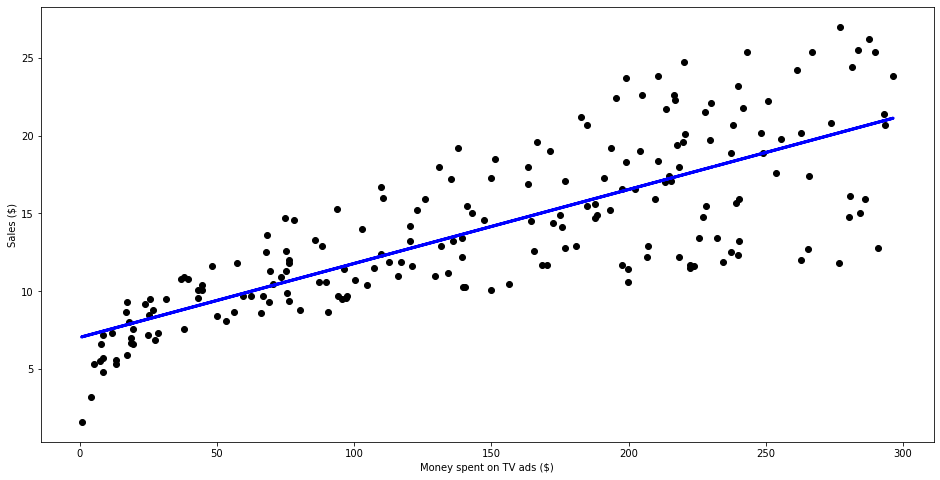

In [21]:
predictions = reg.predict(X)

plt.figure(figsize=(16,8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='black')

plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth=3
)
    
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales ($)')
plt.show();

In [23]:
X = data['TV']
y = data['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 01 May 2020   Prob (F-statistic):           1.47e-42
Time:                        12:45:09   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

About **61% of the variability of sales** is explained by the amount spent on TV ads.

# Multiple Linear Regression

In [29]:
Xs = data.drop(['sales', 'Unnamed: 0'], axis=1)

ys = data['sales'].values.reshape(-1,1)

reg = LR()
reg.fit(Xs, ys)

print('The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper'.format(reg.intercept_[0], 
                                                                                         reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The linear model is: Y = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


In [30]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 01 May 2020   Prob (F-statistic):           1.58e-96
Time:                        13:10:45   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Spending on newspaper is not statistically significant. 

Removing that predictor would slightly reduce the R² value, but we might make better predictions